In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen as uReq

Taking the URL link

In [2]:
url = 'https://www.amazon.in/OnePlus-Midnight-Black-128GB-Storage/product-reviews/B07DJHY82F/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber='

Looping all the URL

In [3]:
url_list =[]
for i in range(1,51):
    url_list.append(url+str(i))

Creating Page_soup for all the URLs

In [4]:
page_soup_list = []
for i in range(len(url_list)):
    ur = url_list[i]
    uClinet = uReq(ur)
    page_html = uClinet.read()
    uClinet.close()
    page_soup =soup(page_html,'html.parser')
    page_soup_list.append(page_soup)

Extracting Ratings alone from the page_content

In [5]:
rating = []
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rat = i.find_all('span',{'class':'a-icon-alt'})
    for i in range(3,len(rat)-5): # the range is specified since it takes the unwanted ratings from the page
        rating.append(rat[i].text.split(' ')[0])

Extracting Reviews and Title from Each user¶

In [6]:
r2=['','Report abuse','\nThere was a problem loading comments right now. Please try again later.','\n',
    'Select the department you want to search in','© 1996-2019, Amazon.com, Inc. or its affiliates']
n =[]
for i in range(len(page_soup_list)):
    i = page_soup_list[i]
    rev = i.find_all('span',{'class':''})
    r =[]
    for j in rev:
        r.append(j.text)
    for k in r:
        if k not in r2:
            n.append(k)

In [7]:
review=[]
title=[]
for i in range(0,len(n)):
    if i%2==1:
        review.append(n[i])
    if i%2==0:
        title.append(n[i])

Creating Dataframe and appending all the extracted columns

In [8]:
final = pd.DataFrame([title,review,rating],index=['Title','Review','Rating'])
final = final.T

In [9]:
final.head()

,Title,Review,Rating
0,Prime,"\n 6,023 global ratings | 3...",5.0
1,Very Nice Product,\n Very Nice Product\n,5.0
2,Used for 3 years still good,\n Good and worthy\n,5.0
3,Best android phone for a iphone user,\n I have been searching for a good replaceme...,1.0
4,Camera is bad,\n Camera sucks. Don't Ever buy this phone fo...,4.0


In [10]:
final.to_csv('Oneplus6T-Review.csv',header=True)

## Word Cloud For Oneplus 6T Reviews

In [11]:
x = final['Review']

In [12]:
import re

In [13]:
x  = ' '.join(x)

In [14]:
x = re.sub('[0-9]','',x)

In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
tokenizer = RegexpTokenizer(r'\w+')

In [17]:
x = tokenizer.tokenize(x)

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\VIRAJ
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [19]:
x = [i.lower() for i in x]

In [20]:
en_stops = stopwords.words('english')
# appending the stpwords with some frequently unwanted words 
en_stops.append('got')
en_stops.append('day')
en_stops.append('even')
en_stops.append('go')
en_stops.append('time')
en_stops.append('product')
en_stops.append('phone')
a = [ i for i in x if i not in en_stops]

In [21]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [24]:
c=[]
for i in a:
    c.append(lemm.lemmatize(i))

In [25]:
cnt = pd.Series(c)

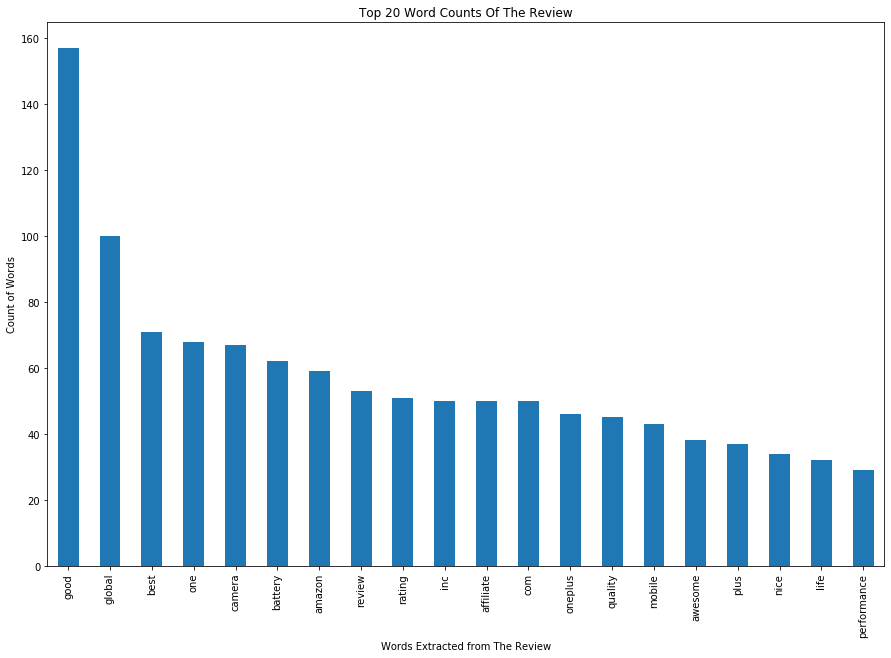

In [26]:
plt.figure(figsize=(15,10))
cnt.value_counts().head(20).plot.bar()
plt.xlabel("Words Extracted from The Review")
plt.ylabel("Count of Words")
plt.title('Top 20 Word Counts Of The Review')
plt.show()


In [27]:
c = ' '.join(c)

In [28]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

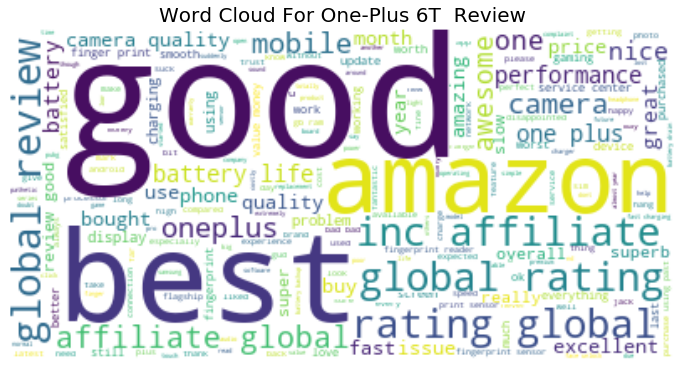

In [29]:
wordcloud = WordCloud(background_color='white').generate(c)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For One-Plus 6T  Review',{'fontsize':20},loc ='center')
plt.show()

## Modeling to extract sentimental Analysis

In [34]:
import textblob
from textblob import TextBlob

In [35]:
x = final['Review']
s=[]

In [36]:
for i in range(len(x)):
    analysis = TextBlob(x[i])
    #print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        s.append( 'Positive')
    else:
        s.append('Negative')

In [37]:
s = pd.Series(s)

In [38]:
Sentiment = pd.DataFrame([x,s],index=['Review','Sentiment'])

In [39]:
Sentiment = Sentiment.T

In [40]:
Sentiment.head(25)

,Review,Sentiment
0,"\n 6,023 global ratings | 3...",Negative
1,\n Very Nice Product\n,Positive
2,\n Good and worthy\n,Positive
3,\n I have been searching for a good replaceme...,Positive
4,\n Camera sucks. Don't Ever buy this phone fo...,Positive
5,\n Avarage\n,Negative
6,\n Best\n,Positive
7,\n Best\n,Positive
8,\n Using for past 2+years very good product\n,Positive
9,\n Best\n,Positive


In [41]:
count =Sentiment.groupby('Sentiment').count()
count

,Review
Sentiment,
Negative,217
Positive,383


In [42]:
Negative_count = count.Review[0]
Positive_count = count.Review[1]

In [43]:
print('Positive Review percentage for ONE-PLUS 6T is :',((Positive_count/(Positive_count + Negative_count))*100),'%')
print('Negative Review percentage for ONE-PLUS 6T is :',((Negative_count/(Positive_count + Negative_count))*100),'%')

Positive Review percentage for ONE-PLUS 6T is : 63.83333333333333 %
Negative Review percentage for ONE-PLUS 6T is : 36.16666666666667 %


## 64 % of the reviews are positive